<a href="https://colab.research.google.com/github/aliwagdy2580/Deep-Learning/blob/main/Rice_Leaf_Diseases_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
import random
from keras.callbacks import ReduceLROnPlateau , EarlyStopping

# import dataset

In [2]:
def load_data():
  data=['drive/MyDrive/dataset/dataset/train','drive/MyDrive/dataset/dataset/test']
  label_names=['Bacterial leaf blight','Brown spot','Leaf smut']
  Images=[]
  Labels=[]
  img_size=150
  for directory in data :
    for folder in os.listdir(directory):
      if folder == 'Bacterial leaf blight':
        label = 0
      elif folder == 'Brown spot':
        label = 1
      elif folder == 'Leaf smut':
        label = 2
      path=os.path.join(directory,folder)
      for image in tqdm(os.listdir(path)):
        image_path=os.path.join(path,image)
        img=cv2.imread(image_path)
        img = cv2.resize(img,(img_size,img_size)) 
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        Images.append(img)
        Labels.append(label)
  return shuffle(Images,Labels,random_state=44)

def class_label(class_code):
  label={0:'Bacterial leaf blight',1:'Brown spot',2:'Leaf smut'}
  return label[class_code]

In [3]:
images,labels=load_data()
train_images=np.array(images)
train_labels=np.array(labels)

100%|██████████| 5/5 [00:00<00:00, 118.49it/s]


In [4]:
print(train_images.shape)
print(train_labels.shape)

(120, 150, 150, 3)
(120,)


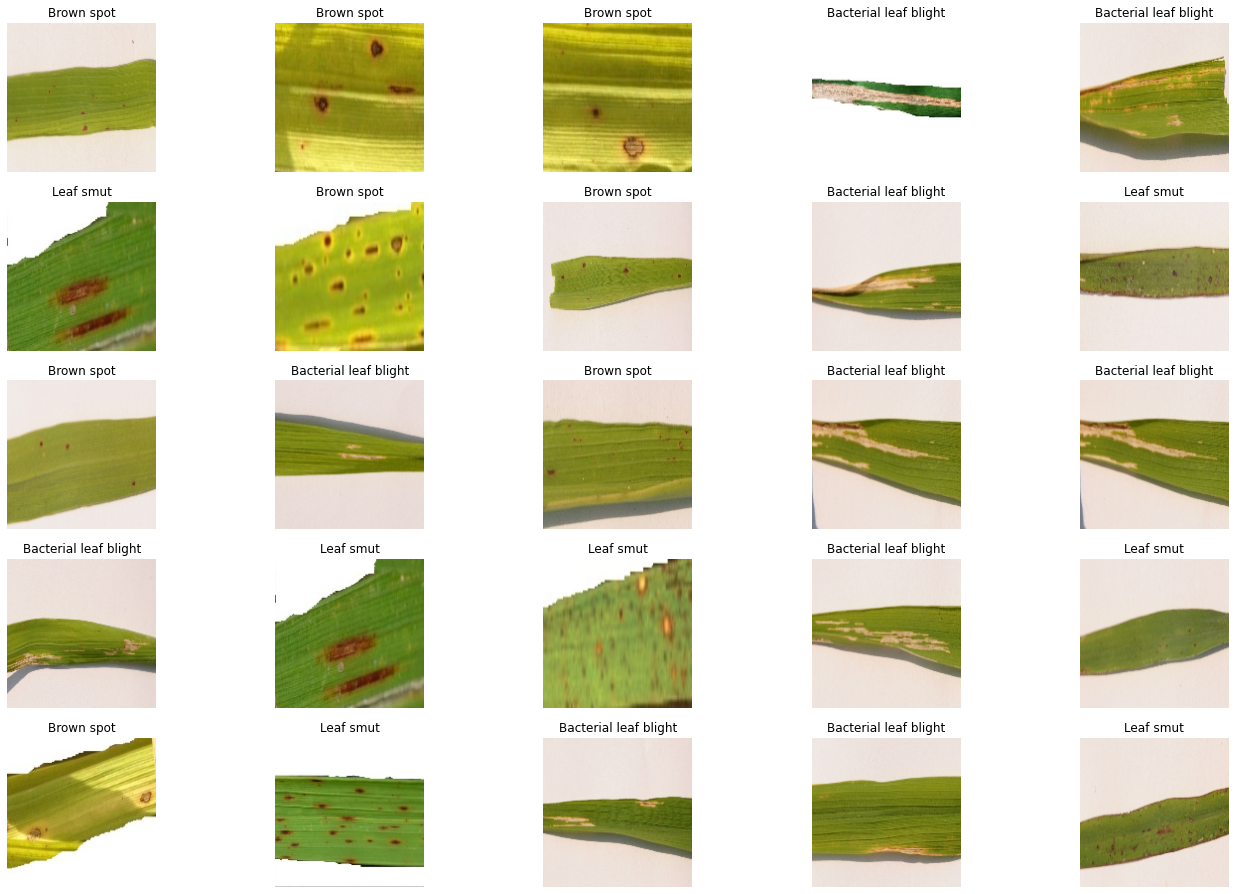

In [5]:
f,ax=plt.subplots(5,5)
f.subplots_adjust(0,0,3,3)
for i in range(5):
  for j in range(5):
    img=np.random.randint(0,len(train_images))
    ax[i,j].imshow(train_images[img])
    ax[i,j].set_title(class_label(train_labels[img]))
    ax[i,j].axis('off')

In [6]:
X_train=train_images[:100,]
y_train=train_labels[:100,]

X_test=train_images[100:,]
y_test=train_labels[100:,]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 150, 150, 3)
(100,)
(20, 150, 150, 3)
(20,)


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(train_images,train_labels,random_state=100,test_size=0.2)


In [8]:
data_gen=ImageDataGenerator(rotation_range=20, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.25,
                         horizontal_flip=True,vertical_flip=True ,fill_mode="nearest")

In [9]:
batch_size=10
train_batchs=data_gen.flow(X_train,y_train,batch_size=batch_size)
test_batchs=data_gen.flow(X_test,y_test)
val_batchs=data_gen.flow(X_val,y_val)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=(150, 150, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 64)        0

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
#learning_rate=ReduceLROnPlateau(patience=2,monitor='val_accuracy')
#early_stopping=EarlyStopping(patience=20)
history=model.fit_generator(train_batchs,epochs=300,validation_data=val_batchs , steps_per_epoch=len(X_train) /batch_size )

Epoch 1/300


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


9/9 [==============================] - 4s 144ms/step - loss: 2.1195 - accuracy: 0.2550 - val_loss: 20.6668 - val_accuracy: 0.2500
Epoch 2/300
9/9 [==============================] - 1s 66ms/step - loss: 1.3877 - accuracy: 0.5909 - val_loss: 7.0443 - val_accuracy: 0.3333
Epoch 3/300
9/9 [==============================] - 1s 67ms/step - loss: 0.9940 - accuracy: 0.6475 - val_loss: 8.6741 - val_accuracy: 0.2917
Epoch 4/300
9/9 [==============================] - 1s 64ms/step - loss: 0.8373 - accuracy: 0.7166 - val_loss: 3.4180 - val_accuracy: 0.4167
Epoch 5/300
9/9 [==============================] - 1s 69ms/step - loss: 1.1406 - accuracy: 0.5476 - val_loss: 5.8027 - val_accuracy: 0.2500
Epoch 6/300
9/9 [==============================] - 1s 67ms/step - loss: 0.9957 - accuracy: 0.6423 - val_loss: 6.6161 - val_accuracy: 0.2917
Epoch 7/300
9/9 [==============================] - 1s 70ms/step - loss: 0.8826 - accuracy: 0.6870 - val_loss: 3.2260 - val_accuracy: 0.4167
Epoch 8/300
9/9 [=============

In [12]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 271ms/step - loss: 0.3024 - accuracy: 0.8000


[0.3024173378944397, 0.800000011920929]

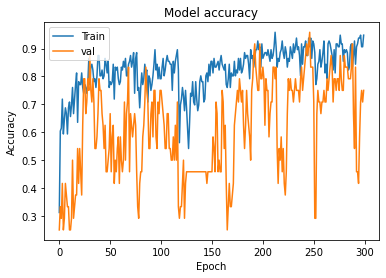

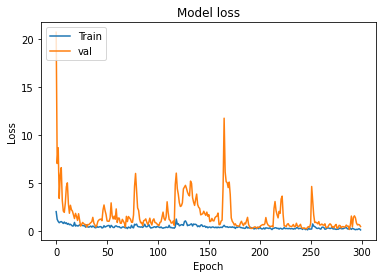

In [13]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [14]:
y_pred=model.predict(X_test)


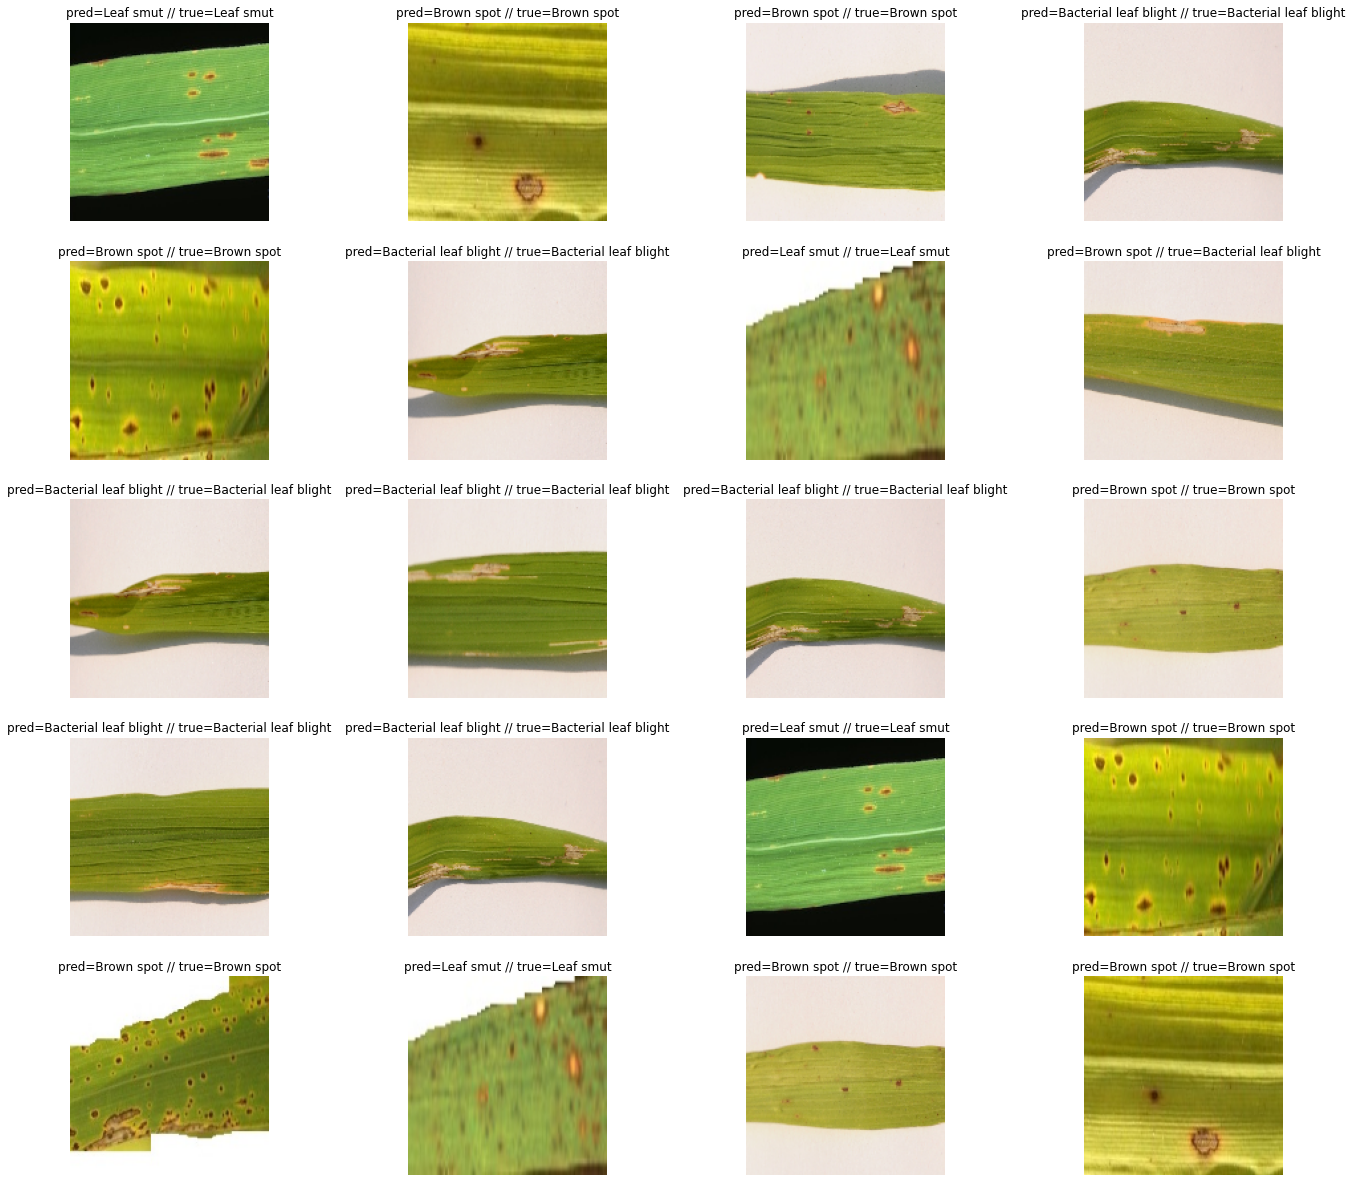

In [15]:
for n , i in enumerate(list(np.random.randint(0,len(X_test),20))) : 
    plt.subplot(5,4,n+1)
    plt.subplots_adjust(0,0,3,4)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title('pred={} // true={}'.format(class_label(np.argmax(y_pred[i])),class_label(y_test[i])))